In [1]:
import pathlib
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
paths = list(pathlib.Path("../media").glob("*.xlsx"))
paths

[WindowsPath('../media/break_vigenere_1.xlsx'),
 WindowsPath('../media/break_vigenere_10.xlsx'),
 WindowsPath('../media/break_vigenere_100.xlsx'),
 WindowsPath('../media/break_vigenere_101.xlsx'),
 WindowsPath('../media/break_vigenere_102.xlsx'),
 WindowsPath('../media/break_vigenere_103.xlsx'),
 WindowsPath('../media/break_vigenere_104.xlsx'),
 WindowsPath('../media/break_vigenere_105.xlsx'),
 WindowsPath('../media/break_vigenere_106.xlsx'),
 WindowsPath('../media/break_vigenere_107.xlsx'),
 WindowsPath('../media/break_vigenere_108.xlsx'),
 WindowsPath('../media/break_vigenere_109.xlsx'),
 WindowsPath('../media/break_vigenere_11.xlsx'),
 WindowsPath('../media/break_vigenere_110.xlsx'),
 WindowsPath('../media/break_vigenere_111.xlsx'),
 WindowsPath('../media/break_vigenere_112.xlsx'),
 WindowsPath('../media/break_vigenere_113.xlsx'),
 WindowsPath('../media/break_vigenere_114.xlsx'),
 WindowsPath('../media/break_vigenere_115.xlsx'),
 WindowsPath('../media/break_vigenere_116.xlsx'),
 Win

In [3]:
frames = []
for path in paths:
    frame = pd.read_excel(path).assign(path=path)
    frames.append(frame)
data = pd.concat(frames)

In [4]:
data = data.drop("Unnamed: 0", axis=1)

In [5]:
data["score"] = data["selection_max"]/data["target"]
data["progress"] = 1 - data["hamming_distance"]/data["key_size"]

In [6]:
data

,generation,generation_count,seed,mutation_threshold,key_size,population_size,global_min,global_max,selection_min,selection_max,best_individual,elapsed,hamming_distance,weights,target,original_key,text_length,path,score,progress
0,1,50,123456789,0.5,6,10,-2576.095225,-2280.620646,-2495.653214,-2280.620646,PUOSEM,0.057949,5,"[0.6, 0.3, 0.1]",-1357.979929,SECRET,1174,..\media\break_vigenere_1.xlsx,1.679421,0.166667
1,2,50,123456789,0.5,6,10,-2506.191179,-2280.620646,-2446.151979,-2280.620646,PUOSEM,0.061206,5,"[0.6, 0.3, 0.1]",-1357.979929,SECRET,1174,..\media\break_vigenere_1.xlsx,1.679421,0.166667
2,3,50,123456789,0.5,6,10,-2462.217341,-2280.620646,-2404.375268,-2280.620646,PUOSEM,0.057754,5,"[0.6, 0.3, 0.1]",-1357.979929,SECRET,1174,..\media\break_vigenere_1.xlsx,1.679421,0.166667
3,4,50,123456789,0.5,6,10,-2527.355676,-2183.031944,-2374.401020,-2183.031944,SAEZEU,0.057145,4,"[0.6, 0.3, 0.1]",-1357.979929,SECRET,1174,..\media\break_vigenere_1.xlsx,1.607558,0.333333
4,5,50,123456789,0.5,6,10,-2505.820515,-2096.441564,-2297.222370,-2096.441564,SAEDEU,0.058003,4,"[0.6, 0.3, 0.1]",-1357.979929,SECRET,1174,..\media\break_vigenere_1.xlsx,1.543794,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,20,50,123456789,0.8,16,500,-1974.143081,-1486.161847,-1742.905560,-1486.161847,GENETIMALGORSTHM,2.799123,2,"[0.6, 0.3, 0.1]",-1357.979929,GENETICALGORITHM,1174,..\media\break_vigenere_99.xlsx,1.094392,0.875000
20,21,50,123456789,0.8,16,500,-2056.368218,-1438.995677,-1703.017404,-1438.995677,GENETIEALGORITHM,2.774629,1,"[0.6, 0.3, 0.1]",-1357.979929,GENETICALGORITHM,1174,..\media\break_vigenere_99.xlsx,1.059659,0.937500
21,22,50,123456789,0.8,16,500,-1915.829952,-1416.682847,-1659.894101,-1416.682847,GENETIMALGORITHM,2.774415,1,"[0.6, 0.3, 0.1]",-1357.979929,GENETICALGORITHM,1174,..\media\break_vigenere_99.xlsx,1.043228,0.937500
22,23,50,123456789,0.8,16,500,-1934.170528,-1416.682847,-1616.034641,-1416.682847,GENETIMALGORITHM,2.772765,1,"[0.6, 0.3, 0.1]",-1357.979929,GENETICALGORITHM,1174,..\media\break_vigenere_99.xlsx,1.043228,0.937500


In [7]:
data.dtypes

generation              int64
generation_count        int64
seed                    int64
mutation_threshold    float64
key_size                int64
population_size         int64
global_min            float64
global_max            float64
selection_min         float64
selection_max         float64
best_individual        object
elapsed               float64
hamming_distance        int64
weights                object
target                float64
original_key           object
text_length             int64
path                   object
score                 float64
progress              float64
dtype: object

In [8]:
progress = data.groupby("path").agg({
    "seed": "count",
    "population_size": "last",
    "mutation_threshold": "last",
    "key_size": "last",
    "hamming_distance": "last",
    "global_min": "first",
    "selection_max": "last",
    "target": "last",
    "text_length":"last",
    "elapsed": ["mean", "sum"]
})
progress.columns = progress.columns.map(lambda x: "_".join(x)) #.replace("_last", ""))
progress["finished"] = progress["hamming_distance_last"] == 0
progress["symbol_progress"] = 1 - progress["hamming_distance_last"]/progress["key_size_last"]
progress["score_progress"] = 1 - (progress["target_last"] - progress["selection_max_last"])/(progress["target_last"] - progress["global_min_first"])
progress

,seed_count,population_size_last,mutation_threshold_last,key_size_last,hamming_distance_last,global_min_first,selection_max_last,target_last,text_length_last,elapsed_mean,elapsed_sum,finished,symbol_progress,score_progress
path,,,,,,,,,,,,,,
..\media\break_vigenere_1.xlsx,17,10,0.50,6,3,-2576.095225,-1879.428002,-1357.979929,1174,0.057597,0.979154,False,0.5000,0.571922
..\media\break_vigenere_10.xlsx,8,1000,0.80,6,0,-2728.019070,-1357.979929,-1357.979929,1174,5.574956,44.599648,True,1.0000,1.000000
..\media\break_vigenere_100.xlsx,19,1000,0.80,16,0,-2644.889504,-1357.979929,-1357.979929,1174,5.553587,105.518155,True,1.0000,1.000000
..\media\break_vigenere_101.xlsx,13,10,0.99,16,11,-2598.779533,-2140.209538,-1357.979929,1174,0.057282,0.744672,False,0.3125,0.369576
..\media\break_vigenere_102.xlsx,25,50,0.99,16,8,-2600.260318,-1889.935256,-1357.979929,1174,0.281048,7.026210,False,0.5000,0.571791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
..\media\break_vigenere_953.xlsx,22,100,0.80,11,0,-1431.139871,-909.417194,-909.417194,1174,0.854372,18.796178,True,1.0000,1.000000
..\media\break_vigenere_96.xlsx,14,10,0.80,16,8,-2598.779533,-2006.102598,-1357.979929,1174,0.057427,0.803984,False,0.5000,0.477657
..\media\break_vigenere_97.xlsx,32,50,0.80,16,5,-2600.260318,-1713.199146,-1357.979929,1174,0.286276,9.160832,False,0.6875,0.714059


In [9]:
data.query("(progress > 0.8) & (original_key == 'SECRET')")["best_individual"].to_csv("text.txt", index=False)

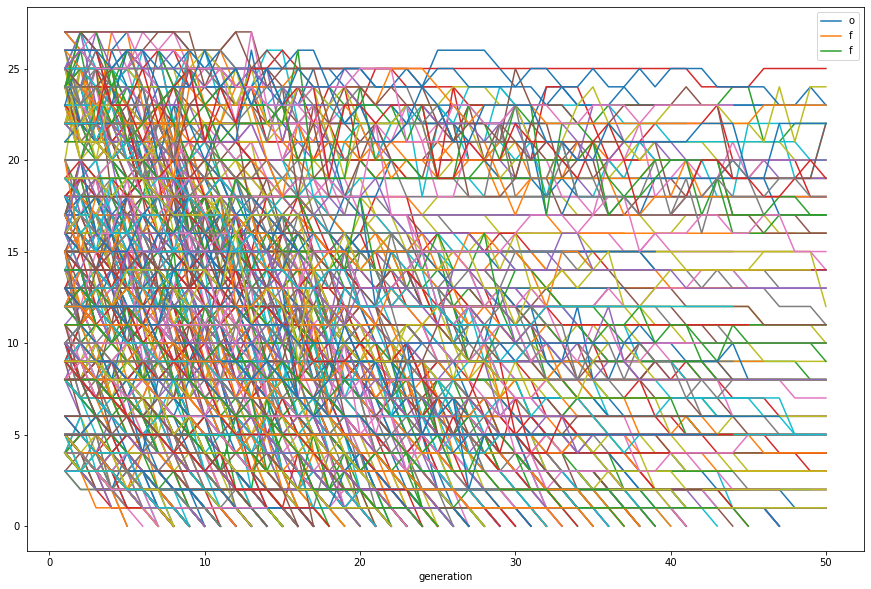

In [10]:
fig, axe = plt.subplots(figsize=(15, 10))
for key, series in data.reset_index().groupby("path"):
    series.plot(x="generation", y="hamming_distance", ax=axe)
axe.legend("off")

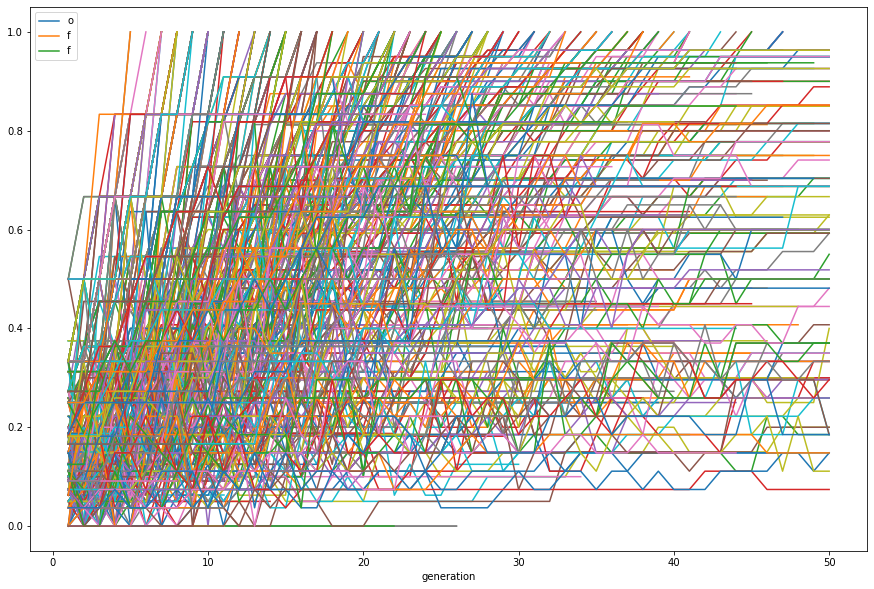

In [11]:
fig, axe = plt.subplots(figsize=(15, 10))
for key, series in data.reset_index().groupby("path"):
    series.plot(x="generation", y="progress", ax=axe)
axe.legend("off")

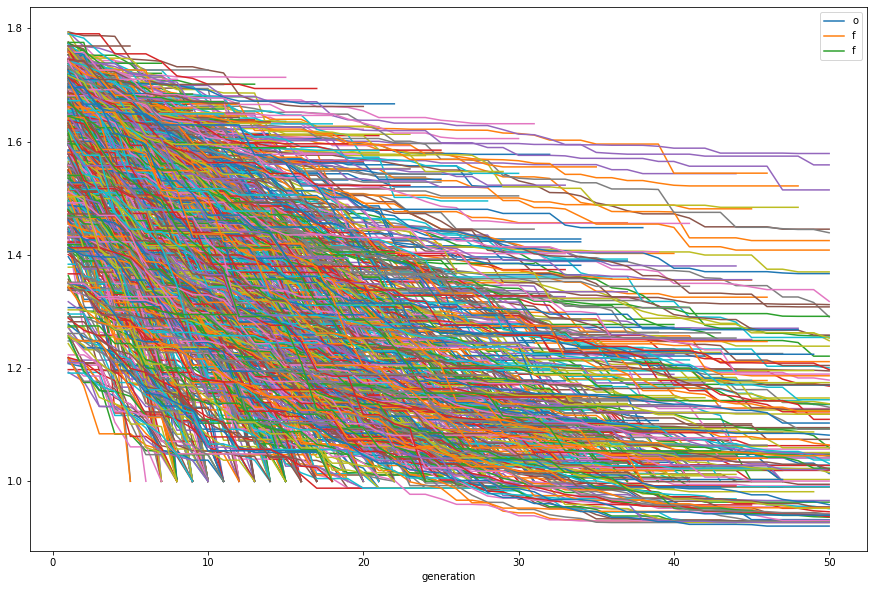

In [12]:
fig, axe = plt.subplots(figsize=(15, 10))
for key, series in data.reset_index().groupby("path"):
    series.plot(x="generation", y="score", ax=axe)
axe.legend("off")

<AxesSubplot:xlabel='key_size_last'>

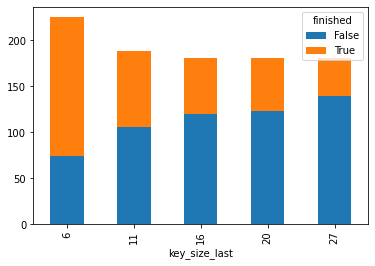

In [13]:
progress.pivot_table(
    index="key_size_last", columns="finished", values="seed_count", aggfunc="count"
).plot(kind="bar", stacked="true")

<AxesSubplot:xlabel='population_size_last'>

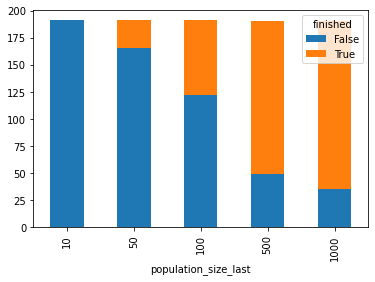

In [14]:
progress.pivot_table(
    index="population_size_last", columns="finished", values="seed_count", aggfunc="count"
).plot(kind="bar", stacked="true")

<AxesSubplot:xlabel='mutation_threshold_last'>

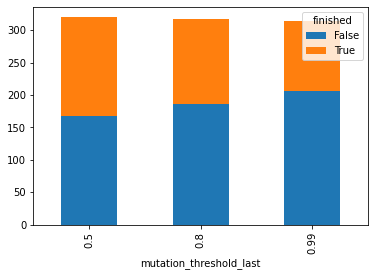

In [15]:
progress.pivot_table(
    index="mutation_threshold_last", columns="finished", values="seed_count", aggfunc="count"
).plot(kind="bar", stacked="true")

<AxesSubplot:xlabel='symbol_progress', ylabel='score_progress'>

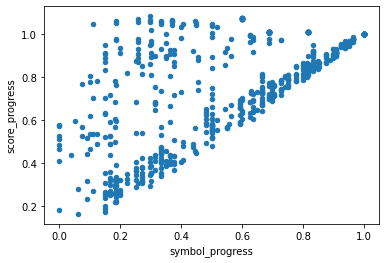

In [16]:
progress.plot.scatter(x="symbol_progress", y="score_progress")

<AxesSubplot:title={'center':'elapsed_mean'}, xlabel='key_size_last'>

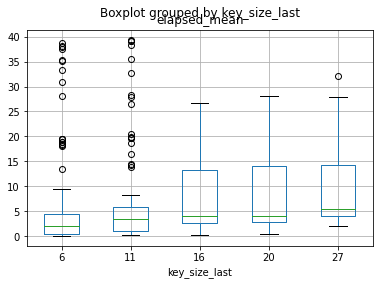

In [17]:
progress.query("finished").boxplot(by="key_size_last", column="elapsed_mean")

<AxesSubplot:title={'center':'elapsed_sum'}, xlabel='key_size_last'>

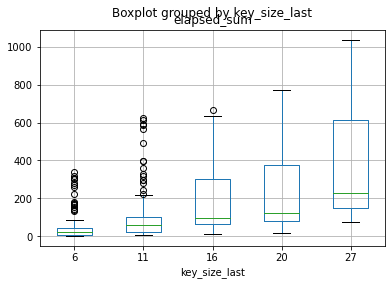

In [18]:
progress.query("finished").boxplot(by="key_size_last", column="elapsed_sum")

<AxesSubplot:title={'center':'seed_count'}, xlabel='key_size_last'>

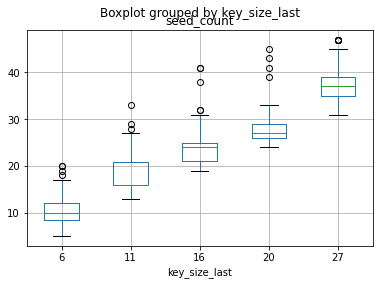

In [19]:
progress.query("finished").boxplot(by="key_size_last", column="seed_count")

<AxesSubplot:title={'center':'elapsed_mean'}, xlabel='population_size_last'>

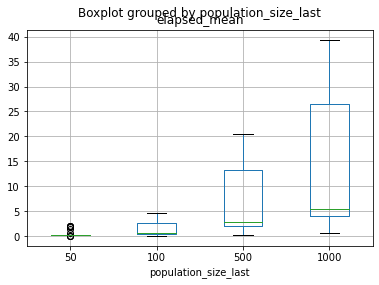

In [20]:
progress.query("finished").boxplot(by="population_size_last", column="elapsed_mean")

<AxesSubplot:title={'center':'elapsed_sum'}, xlabel='population_size_last'>

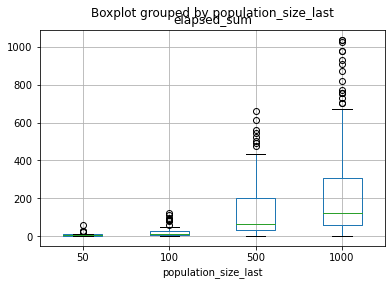

In [21]:
progress.query("finished").boxplot(by="population_size_last", column="elapsed_sum")

<AxesSubplot:title={'center':'seed_count'}, xlabel='population_size_last'>

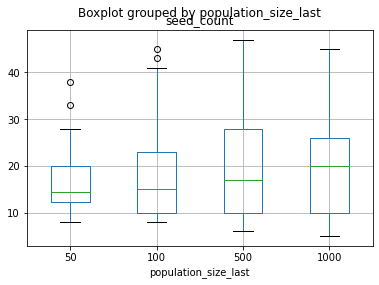

In [22]:
progress.query("finished").boxplot(by="population_size_last", column="seed_count")

<AxesSubplot:title={'center':'seed_count'}, xlabel='population_size_last'>

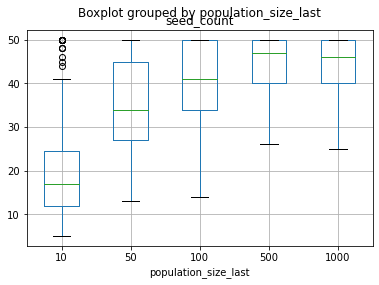

In [23]:
progress.query("~finished").boxplot(by="population_size_last", column="seed_count")

<AxesSubplot:title={'center':'seed_count'}, xlabel='population_size_last'>

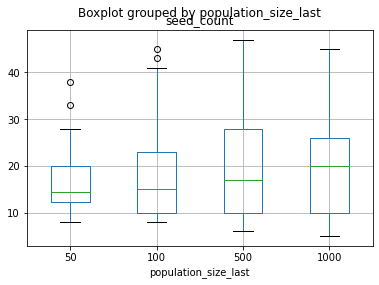

In [24]:
progress.query("finished").boxplot(by="population_size_last", column="seed_count")

<AxesSubplot:title={'center':'elapsed_mean'}, xlabel='mutation_threshold_last'>

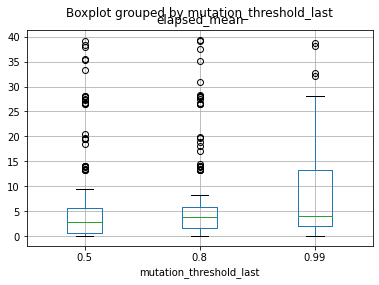

In [25]:
progress.query("finished").boxplot(by="mutation_threshold_last", column="elapsed_mean")

<AxesSubplot:title={'center':'elapsed_sum'}, xlabel='[mutation_threshold_last, finished]'>

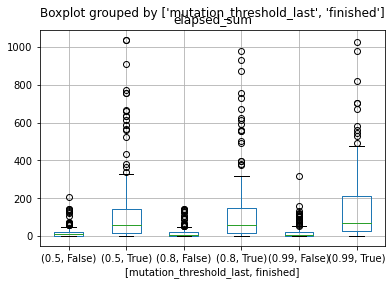

In [26]:
progress.boxplot(by=["mutation_threshold_last", "finished"], column="elapsed_sum")

<AxesSubplot:title={'center':'seed_count'}, xlabel='[mutation_threshold_last, finished]'>

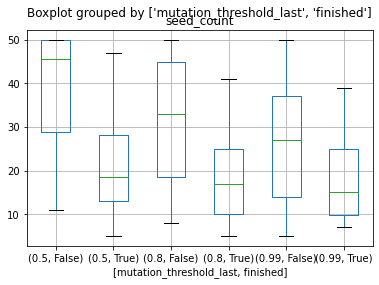

In [27]:
progress.boxplot(by=["mutation_threshold_last", "finished"], column="seed_count")

In [28]:
data.groupby("path")["elapsed"]